<a href="https://colab.research.google.com/github/liyueling13/Predicting-Banned-Books/blob/main/6)_Banned_Books_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6) Banned Books - Classification

Let's see if we can use the features we engineered from book desriptions to predict whether a book is banned.

11/10/23

## Setup

In [1]:
# this performs line wrapping on output text in Colab

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Data Science/Springboard assignments/Capstone Three/Banned Books')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Train/Test Split and Dummy Classifier Baseline

In [5]:
prediction_df = pd.read_csv('prediction_df.csv')
prediction_df

,author,title,label,description,nyt_author,middle_and_high_school,award_winning_childrens,gender_and_sexuality,families_and_home,race_and_america,growing_up,young_woman_meets_man,classics,boy_girl_story,book_series,lgbtq_sexuality,friendship,prize_novel
0,Arundhati Roy,The God of Small Things,1,debut novel affluent indian family fateful day...,0.03021,0.00000,0.00000,0.00000,0.08918,0.00000,0.04075,0.00000,0.05655,0.01540,0.01050,0.00000,0.01384,0.10782
1,Kevin Noble Maillard,Fry Bread,1,winner robert sibert informational book medal ...,0.03985,0.01887,0.19760,0.00000,0.03409,0.02503,0.00571,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00016
2,Oge Mora,Saturday,1,special saturday plan mother way time,0.04611,0.00214,0.00000,0.00000,0.03452,0.00000,0.01626,0.00000,0.00000,0.00769,0.00000,0.00306,0.01487,0.00000
3,Jeffery Deaver,The Bone Collector,0,miss television series lincoln rhyme hunt bone...,0.05074,0.00196,0.00000,0.00000,0.00000,0.00357,0.00000,0.00000,0.01026,0.00323,0.06275,0.00000,0.00000,0.01957
4,Jennifer Probst,The Marriage Bargain,0,order selfish need bookstore owner billionaire...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06071,0.00000,0.00000,0.00000,0.00000,0.00000,0.10148,0.00222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,Arvin Ahmadi,How It All Blew Up,1,simon homo sapiens agenda italy ahmadi newest ...,0.00737,0.00000,0.00000,0.01545,0.03822,0.01567,0.09490,0.02039,0.00000,0.00000,0.00716,0.00206,0.06154,0.02668
1473,Jaye Robin Brown,The Key to You and Me,1,sweet funny lgbtq romance perfect fan becky al...,0.00872,0.00000,0.00616,0.00000,0.00000,0.00021,0.00000,0.00000,0.00000,0.04664,0.00000,0.00235,0.12218,0.03016
1474,Victoria Jamieson,When Stars Are Scattered,1,national book award finalist remarkable graphi...,0.02666,0.03437,0.01576,0.00000,0.09213,0.00000,0.00724,0.01363,0.00000,0.02665,0.00188,0.00375,0.00623,0.10011
1475,Megan Atwood,Raise the Stakes,1,audisee audio combine professional narration s...,0.00365,0.00000,0.00000,0.01220,0.00931,0.00000,0.00791,0.00322,0.00882,0.01792,0.01367,0.03065,0.00817,0.00476


In [6]:
prediction_df.columns

Index(['author', 'title', 'label', 'description', 'nyt_author',
       'middle_and_high_school', 'award_winning_childrens',
       'gender_and_sexuality', 'families_and_home', 'race_and_america',
       'growing_up', 'young_woman_meets_man', 'classics', 'boy_girl_story',
       'book_series', 'lgbtq_sexuality', 'friendship', 'prize_novel'],
      dtype='object')

In [7]:
prediction_df['label'].value_counts()

1    938
0    539
Name: label, dtype: int64

In [8]:
# baseline: if we predicted all banned, we'd get 64% accuracy

938/(938+539)

0.6350710900473934

In [9]:
X = prediction_df.loc[:, 'nyt_author':]
X

,nyt_author,middle_and_high_school,award_winning_childrens,gender_and_sexuality,families_and_home,race_and_america,growing_up,young_woman_meets_man,classics,boy_girl_story,book_series,lgbtq_sexuality,friendship,prize_novel
0,0.03021,0.00000,0.00000,0.00000,0.08918,0.00000,0.04075,0.00000,0.05655,0.01540,0.01050,0.00000,0.01384,0.10782
1,0.03985,0.01887,0.19760,0.00000,0.03409,0.02503,0.00571,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00016
2,0.04611,0.00214,0.00000,0.00000,0.03452,0.00000,0.01626,0.00000,0.00000,0.00769,0.00000,0.00306,0.01487,0.00000
3,0.05074,0.00196,0.00000,0.00000,0.00000,0.00357,0.00000,0.00000,0.01026,0.00323,0.06275,0.00000,0.00000,0.01957
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.06071,0.00000,0.00000,0.00000,0.00000,0.00000,0.10148,0.00222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.00737,0.00000,0.00000,0.01545,0.03822,0.01567,0.09490,0.02039,0.00000,0.00000,0.00716,0.00206,0.06154,0.02668
1473,0.00872,0.00000,0.00616,0.00000,0.00000,0.00021,0.00000,0.00000,0.00000,0.04664,0.00000,0.00235,0.12218,0.03016
1474,0.02666,0.03437,0.01576,0.00000,0.09213,0.00000,0.00724,0.01363,0.00000,0.02665,0.00188,0.00375,0.00623,0.10011
1475,0.00365,0.00000,0.00000,0.01220,0.00931,0.00000,0.00791,0.00322,0.00882,0.01792,0.01367,0.03065,0.00817,0.00476


In [10]:
y = prediction_df['label']
y

0       1
1       1
2       1
3       0
4       0
       ..
1472    1
1473    1
1474    1
1475    1
1476    0
Name: label, Length: 1477, dtype: int64

In [11]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [12]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print(f"Accuracy Score on Training Set for Dummy Classifier: {dummy.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Dummy Classifier: {dummy.score(X_test, y_test):.3f}")

# the dummy classifier indeed gives 60%ish accuracy

Accuracy Score on Training Set for Dummy Classifier: 0.636
Accuracy Score on Test Set for Dummy Classifier: 0.632


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
# we'll use class_weight = "balanced"
# since our data is not completely balanced

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.3f}")

# well at 77%-81%, this is already a lot better!

Accuracy Score on Training Set for Logistic Regression: 0.806
Accuracy Score on Test Set for Logistic Regression: 0.774


In [ ]:
# params for logreg: penalty = l2, C: 1, solver=lbfgs

In [15]:
# let's try finding best params with cv

kf = KFold(n_splits=5, shuffle=True, random_state=111)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'solver': ['liblinear', 'newton-cg', 'lbfgs'],
          "class_weight": ['balanced']}

logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)
logreg_cv.fit(X_train, y_train)

print(f"Tuned Logistic Regression Parameters: {logreg_cv.best_params_}")
print(f"Tuned Logistic Regression Best Accuracy Score: {logreg_cv.best_score_}")
print(f"Tuned Logistic Regression Test Set Accuracy Score: {logreg_cv.score(X_test, y_test):.3f}")

# it's not a dramatic improvement
# let's keep our earlier parameters but change C=0.1

Tuned Logistic Regression Parameters: {'solver': 'liblinear', 'class_weight': 'balanced', 'C': 0.01}
Tuned Logistic Regression Best Accuracy Score: 0.8009726095973683
Tuned Logistic Regression Test Set Accuracy Score: 0.784


In [16]:
# we'll keep our earlier parameters but change C=0.1
# this is our final logreg model

logreg = LogisticRegression(C=0.1, class_weight='balanced')
logreg.fit(X_train, y_train)
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.3f}")

Accuracy Score on Training Set for Logistic Regression: 0.804
Accuracy Score on Test Set for Logistic Regression: 0.780


## K Nearest Neighbors

In [17]:
# no way to balance classes here

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {"n_neighbors": np.arange(1, 50, 2),
        "weights": ['uniform', 'distance'],
         'p': [1, 2]}
knn_cv = RandomizedSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [18]:
print(f"Tuned KNN Classifier Best Parameters: {knn_cv.best_params_}")
print(f"Tuned KNN Classifier Best Accuracy Score: {knn_cv.best_score_:.3f}")
print(f"Tuned KNN Classifier Best Accuracy on Test Set: {knn_cv.score(X_test, y_test):.3f}")

# accuracy scores are very close to LogReg

Tuned KNN Classifier Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 47}
Tuned KNN Classifier Best Accuracy Score: 0.784
Tuned KNN Classifier Best Accuracy on Test Set: 0.804


In [19]:
# saving our best model

knn = knn_cv.best_estimator_

In [20]:
# we want to see if the feature coefficients are similar
# but KNN doesn't have features in the same way

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42)
perm_importance.importances_mean

array([0.02015766, 0.01328829, 0.0152027 , 0.00822072, 0.02207207,
       0.02072072, 0.00867117, 0.01238739, 0.03727477, 0.01936937,
       0.04977477, 0.01711712, 0.02477477, 0.01509009])

In [21]:
knn_coefs = [x for x in perm_importance.importances_mean]
knn_coefs

[0.020157657657657667,
 0.013288288288288286,
 0.015202702702702709,
 0.008220720720720717,
 0.02207207207207208,
 0.020720720720720724,
 0.008671171171171166,
 0.012387387387387387,
 0.03727477477477478,
 0.019369369369369373,
 0.04977477477477478,
 0.01711711711711712,
 0.024774774774774785,
 0.015090090090090092]

In [22]:
knn_feature_names = [x for x in knn.feature_names_in_]
# knn_coefs = [x for x in perm_importance.importances_mean]

knn_feats = {}

for i in range(len(knn_feature_names)):
  knn_feats[knn_feature_names[i]] = knn_coefs[i]

knn_feats

{'nyt_author': 0.020157657657657667,
 'middle_and_high_school': 0.013288288288288286,
 'award_winning_childrens': 0.015202702702702709,
 'gender_and_sexuality': 0.008220720720720717,
 'families_and_home': 0.02207207207207208,
 'race_and_america': 0.020720720720720724,
 'growing_up': 0.008671171171171166,
 'young_woman_meets_man': 0.012387387387387387,
 'classics': 0.03727477477477478,
 'boy_girl_story': 0.019369369369369373,
 'book_series': 0.04977477477477478,
 'lgbtq_sexuality': 0.01711711711711712,
 'friendship': 0.024774774774774785,
 'prize_novel': 0.015090090090090092}

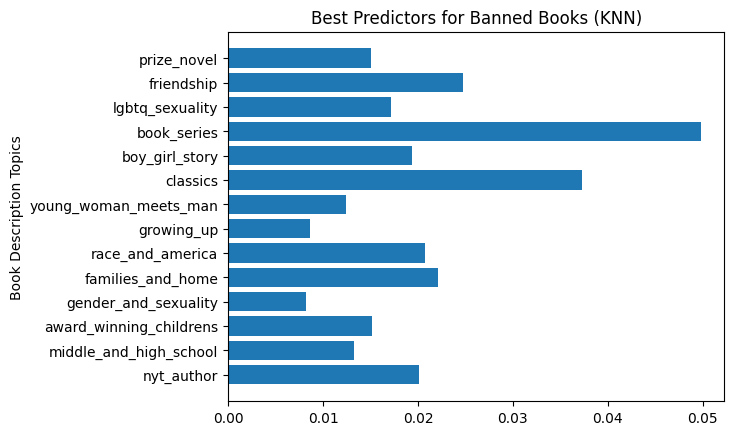

In [23]:
names = list(knn_feats.keys())
values = list(knn_feats.values())

plt.barh(range(len(knn_feats)), values, tick_label=names)
plt.title('Best Predictors for Banned Books (KNN)')
plt.ylabel('Book Description Topics')
# plt.savefig('Banned_KNN_Coefficients.png', bbox_inches='tight')
plt.show()

In [ ]:
# interesting, these predictors are a bit different
# book series and classics seem the highest

## Decision Tree and Random Forest

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
params = {"criterion": ['gini', 'entropy', 'log_loss'],
        "splitter": ['best', 'random'],
         'max_depth': [5, 10, 25, 50, None]}
dtc_cv = RandomizedSearchCV(dtc, params, cv=5)
dtc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 25, 50, None],
                                        'splitter': ['best', 'random']})

In [25]:
print(f"Tuned Decision Tree Classifier Best Parameters: {dtc_cv.best_params_}")
print(f"Tuned Decision Tree Classifier Best Accuracy Score: {dtc_cv.best_score_:.3f}")
print(f"Tuned Decision Tree Classifier Best Accuracy on Test Set: {dtc_cv.score(X_test, y_test):.3f}")

# not as good as before!

Tuned Decision Tree Classifier Best Parameters: {'splitter': 'random', 'max_depth': 5, 'criterion': 'entropy'}
Tuned Decision Tree Classifier Best Accuracy Score: 0.735
Tuned Decision Tree Classifier Best Accuracy on Test Set: 0.720


In [26]:
# can we get something much better with RF?

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(class_weight='balanced')
RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [27]:
print(f"Tuned Random Forest Classifier Best Accuracy Score: {RF.score(X_train, y_train):.3f}")
print(f"Tuned Random Forest Classifier Best Accuracy on Test Set: {RF.score(X_test, y_test):.3f}")

# overfits on training set!

Tuned Random Forest Classifier Best Accuracy Score: 1.000
Tuned Random Forest Classifier Best Accuracy on Test Set: 0.764


In [28]:
# RF with Randomized Search CV

params = {"criterion": ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 10, 25, 50, None],
          'max_features': ['sqrt', 'log2', None],
          'class_weight': ['balanced']}
RF_cv = RandomizedSearchCV(RF, params, cv=5)
RF_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 25, 50, None],
                                        'max_features': ['sqrt', 'log2', None]})

In [29]:
print(f"Tuned Decision Tree Classifier Best Parameters: {RF_cv.best_params_}")
print(f"Tuned Random Forest Classifier Best Accuracy Score: {RF_cv.best_score_:.3f}")
print(f"Tuned Random Forest Classifier Best Accuracy on Test Set: {RF_cv.score(X_test, y_test):.3f}")

Tuned Decision Tree Classifier Best Parameters: {'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}
Tuned Random Forest Classifier Best Accuracy Score: 0.797
Tuned Random Forest Classifier Best Accuracy on Test Set: 0.784


In [ ]:
# not too much of an improvement!
# we'll stick with logreg for interpretability

## Exploring LogReg

All of our models performed roughly the same. For maximum interpretability, we'll move forward with our Logreg model.

*   Which features are most important?
*   Which books in the test set were predicted incorrectly?



In [30]:
print(logreg.feature_names_in_)
print(logreg.coef_)

['nyt_author' 'middle_and_high_school' 'award_winning_childrens'
 'gender_and_sexuality' 'families_and_home' 'race_and_america'
 'growing_up' 'young_woman_meets_man' 'classics' 'boy_girl_story'
 'book_series' 'lgbtq_sexuality' 'friendship' 'prize_novel']
[[-0.26893064  0.50492072  0.28571969  0.37992979  0.22499652  0.28285085
   0.04732952 -0.15900568 -0.51433839  0.38353892 -0.73867627  0.38072844
   0.42264897 -0.24803819]]


In [31]:
logreg_feature_names = [x for x in logreg.feature_names_in_]
logreg_coefs = [x for x in logreg.coef_]

In [32]:
logreg_coefs[0][1]

0.5049207211220316

In [33]:
logreg_feats = {}

for i in range(len(logreg_feature_names)):
  logreg_feats[logreg_feature_names[i]] = logreg_coefs[0][i]

logreg_feats

{'nyt_author': -0.26893064355288215,
 'middle_and_high_school': 0.5049207211220316,
 'award_winning_childrens': 0.28571968547213833,
 'gender_and_sexuality': 0.37992979489400897,
 'families_and_home': 0.22499652134122655,
 'race_and_america': 0.2828508478800924,
 'growing_up': 0.04732952079457312,
 'young_woman_meets_man': -0.15900567607941177,
 'classics': -0.5143383914960924,
 'boy_girl_story': 0.3835389192840016,
 'book_series': -0.7386762708601015,
 'lgbtq_sexuality': 0.3807284398889175,
 'friendship': 0.42264897129004086,
 'prize_novel': -0.24803818657231638}

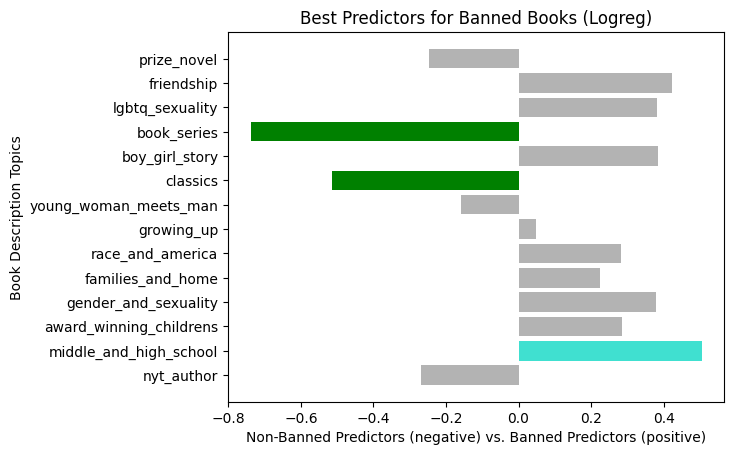

In [43]:
names = list(logreg_feats.keys())
values = list(logreg_feats.values())

plt.barh(range(len(logreg_feats)), values, tick_label=names,
         color=('0.7',
                'turquoise',
                '0.7',
                '0.7',
                '0.7',
                '0.7',
                '0.7',
                '0.7',
                'green',
                '0.7',
                'green',
                '0.7',
                '0.7',
                '0.7'))
plt.title('Best Predictors for Banned Books (Logreg)')
plt.xlabel('Non-Banned Predictors (negative) vs. Banned Predictors (positive)')
plt.ylabel('Book Description Topics')
# plt.savefig('Banned_Logreg_Coefficients.png', bbox_inches='tight')
plt.show()

In [37]:
y_pred = logreg.predict(X_test)
y_probs = logreg.predict_proba(X_test)
confusion_matrix(y_test, y_pred)

array([[ 88,  21],
       [ 44, 143]])

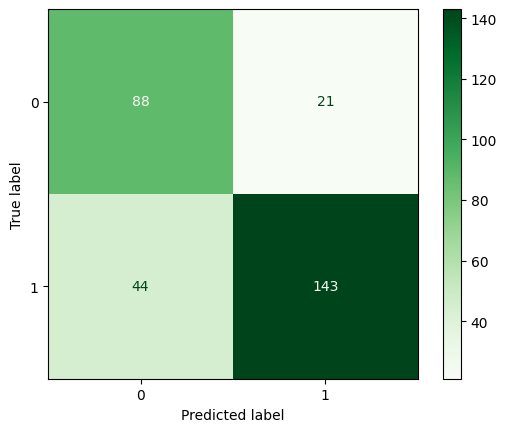

In [38]:
# vis of confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [44]:
y_probs

array([[0.49945197, 0.50054803],
       [0.49467113, 0.50532887],
       [0.50101368, 0.49898632],
       [0.50408743, 0.49591257],
       [0.52004387, 0.47995613],
       [0.46462062, 0.53537938],
       [0.49162466, 0.50837534],
       [0.49929012, 0.50070988],
       [0.51029487, 0.48970513],
       [0.4869902 , 0.5130098 ],
       [0.48320541, 0.51679459],
       [0.47766172, 0.52233828],
       [0.51716556, 0.48283444],
       [0.50963255, 0.49036745],
       [0.49407421, 0.50592579],
       [0.52163274, 0.47836726],
       [0.50955941, 0.49044059],
       [0.48611653, 0.51388347],
       [0.51545692, 0.48454308],
       [0.48965589, 0.51034411],
       [0.47914729, 0.52085271],
       [0.47747125, 0.52252875],
       [0.47864008, 0.52135992],
       [0.51579339, 0.48420661],
       [0.50913519, 0.49086481],
       [0.5215984 , 0.4784016 ],
       [0.52063215, 0.47936785],
       [0.48628433, 0.51371567],
       [0.50610298, 0.49389702],
       [0.50461959, 0.49538041],
       [0.

In [45]:
y_proba = y_probs[:, 1]

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy Score on Test Set for Logistic Regression Classifier: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision Score on Test Set for Logistic Regression Classifier: {precision_score(y_test, y_pred):.3f}")
print(f"Recall Score on Test Set for Logistic Regression Classifier: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score on Test Set for Logistic Regression Classifier: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC score on Test Set for Logistic Regression Classifier: {roc_auc_score(y_test, y_proba):.3f}")

Accuracy Score on Test Set for Logistic Regression Classifier: 0.780
Precision Score on Test Set for Logistic Regression Classifier: 0.872
Recall Score on Test Set for Logistic Regression Classifier: 0.765
F1 Score on Test Set for Logistic Regression Classifier: 0.815
ROC-AUC score on Test Set for Logistic Regression Classifier: 0.853


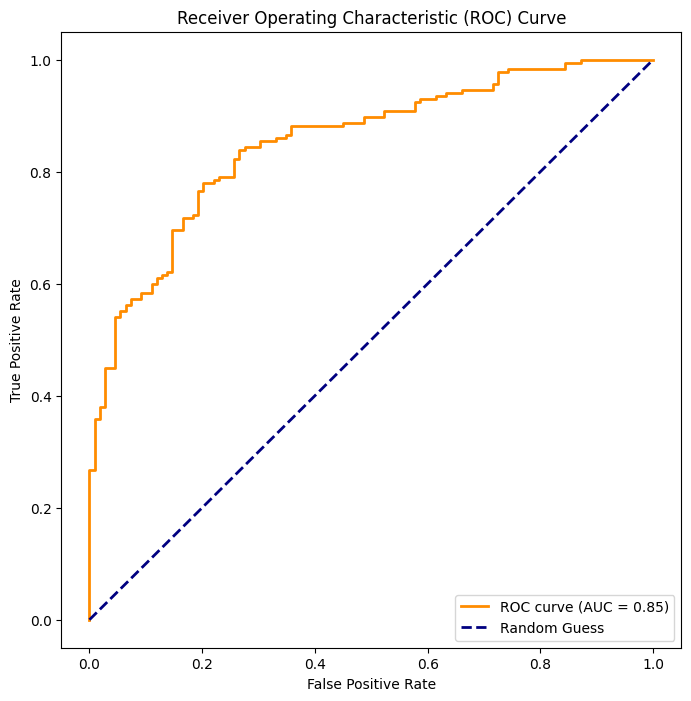

In [51]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
roc_auc

0.8525732227836923

In [53]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

# obviously this is extremely close to 0.5

0.4997685866031148

In [54]:
y_pred_optimal = (y_proba > optimal_threshold).astype(int)
y_pred_optimal

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [55]:
print(f"Accuracy Score for LogReg with Optimal Threshold: {accuracy_score(y_test, y_pred_optimal):.3f}")

# this is pretty much the same so we'll stick with our original model

Accuracy Score for LogReg with Optimal Threshold: 0.784


In [56]:
# which books were incorrectly predicted in the test set?

different_preds = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
different_preds

[1,
 3,
 9,
 14,
 15,
 18,
 23,
 24,
 26,
 30,
 35,
 40,
 44,
 47,
 49,
 52,
 53,
 55,
 62,
 71,
 76,
 81,
 85,
 97,
 98,
 101,
 104,
 118,
 127,
 130,
 133,
 138,
 144,
 147,
 151,
 160,
 161,
 165,
 168,
 191,
 196,
 198,
 201,
 207,
 208,
 221,
 223,
 225,
 232,
 244,
 248,
 250,
 251,
 252,
 253,
 256,
 263,
 264,
 269,
 276,
 278,
 281,
 283,
 284,
 285]

In [57]:
# now we have to match these different predictions
# to the correct index number in y_test

y_test

1122    1
1168    0
485     0
870     1
523     0
       ..
856     1
880     0
740     0
203     0
1077    1
Name: label, Length: 296, dtype: int64

In [58]:
# here are all the index numbers in y_test

y_list = list(y_test.index)
y_list

[1122,
 1168,
 485,
 870,
 523,
 896,
 253,
 264,
 68,
 127,
 1068,
 994,
 262,
 1219,
 1229,
 1296,
 848,
 1377,
 413,
 590,
 1019,
 623,
 305,
 778,
 541,
 160,
 1304,
 1022,
 942,
 367,
 236,
 726,
 1309,
 406,
 399,
 781,
 814,
 1186,
 562,
 339,
 322,
 677,
 530,
 109,
 787,
 1051,
 1474,
 745,
 307,
 18,
 976,
 155,
 500,
 784,
 201,
 1092,
 1070,
 1016,
 674,
 918,
 1390,
 139,
 678,
 751,
 884,
 14,
 1036,
 827,
 269,
 351,
 666,
 179,
 1303,
 158,
 765,
 732,
 100,
 465,
 24,
 670,
 506,
 692,
 1012,
 148,
 403,
 1335,
 1137,
 1119,
 263,
 876,
 427,
 1349,
 1345,
 548,
 1336,
 431,
 343,
 234,
 1448,
 10,
 1268,
 875,
 1327,
 377,
 534,
 766,
 91,
 514,
 902,
 764,
 1328,
 1372,
 145,
 372,
 805,
 1192,
 881,
 611,
 932,
 368,
 702,
 1146,
 641,
 374,
 409,
 1097,
 1018,
 577,
 607,
 152,
 1222,
 525,
 205,
 1279,
 1079,
 831,
 650,
 823,
 800,
 575,
 120,
 672,
 66,
 887,
 347,
 1361,
 404,
 1341,
 588,
 364,
 365,
 1266,
 898,
 1298,
 1056,
 1021,
 571,
 1013,
 231,
 878,
 

In [59]:
# now we want the index numbers in y_test (put into the list y_list)
# which were predicted to be a different result

different_inds = []

for i in different_preds:
  different_inds.append(y_list[i])

different_inds

[1168,
 870,
 127,
 1229,
 1296,
 413,
 778,
 541,
 1304,
 236,
 781,
 322,
 787,
 745,
 18,
 500,
 784,
 1092,
 678,
 179,
 100,
 692,
 1335,
 234,
 1448,
 875,
 534,
 932,
 577,
 1222,
 1279,
 800,
 347,
 1341,
 1266,
 477,
 1313,
 496,
 1310,
 297,
 1029,
 925,
 685,
 319,
 1460,
 780,
 1438,
 235,
 1232,
 1454,
 935,
 948,
 1045,
 419,
 238,
 207,
 105,
 244,
 693,
 1457,
 453,
 288,
 1005,
 956,
 116]

In [60]:
print(len(different_preds))
print(len(y_test))
print(len(y_list))
print(len(different_inds))

65
296
296
65


In [61]:
# these are the books in y_test that were incorrectly predicted
# by the logreg classifier

In [62]:
different_books = []

for i in different_inds:
  different_books.append((prediction_df.loc[i].author, prediction_df.loc[i].title))

different_books

[('S.C. Stephens', 'Effortless'),
 ('George Takei', 'They Called Us Enemy'),
 ('Jason Fried', 'Rework'),
 ('Walter Isaacson', 'Steve Jobs'),
 ('Jim Ottaviani', 'The Imitation Game'),
 ('Cynthia Chin-Lee', 'Amelia to Zora'),
 ('Allison Lassieur', '25 Women Who Dared to Go'),
 ('Alicia Jasinska', 'The Dark Tide'),
 ('Kurt Vonnegut Jr.', 'Slaughterhouse-Five'),
 ('Christina Lauren', 'Beautiful Bastard'),
 ('Lucas Rocha', 'Where We Go From Here'),
 ('Deb Vanasse', 'Totem Tale'),
 ('Jonathan Safran Foer', 'Extremely Loud & Incredibly Close'),
 ('Lemony Snicket', 'The Wide Window'),
 ('Jojo Moyes', 'One Plus One'),
 ('Lisa See', 'Snow Flower and the Secret Fan'),
 ('Abigail Tarttelin', 'Golden Boy'),
 ('Katherine Paterson', 'Bridge to Terabithia'),
 ('Susann Cokal', 'The Kingdom of Little Wounds'),
 ('Carolina de Robertis', 'The Gods of Tango'),
 ('Alice Sebold', 'The Lovely Bones'),
 ('Neal Shusterman', 'Game Changer'),
 ('Sophie Kinsella', 'Shopaholic & Baby'),
 ('Jill Sherman', '25 Women 

In [63]:
prediction_df[prediction_df.index.isin(different_inds)]

,author,title,label,description,nyt_author,middle_and_high_school,award_winning_childrens,gender_and_sexuality,families_and_home,race_and_america,growing_up,young_woman_meets_man,classics,boy_girl_story,book_series,lgbtq_sexuality,friendship,prize_novel
18,Jojo Moyes,One Plus One,0,single mom chaotic family quirky stranger irre...,0.03085,0.00000,0.00000,0.00000,0.09224,0.00000,0.00000,0.01313,0.01399,0.00000,0.00000,0.00000,0.05915,0.01044
100,Alice Sebold,The Lovely Bones,1,spirit fourteen year old susie salmon murder n...,0.01213,0.00408,0.00000,0.02168,0.06718,0.00000,0.10473,0.04121,0.02016,0.00000,0.00000,0.00000,0.00000,0.04320
105,Jodi Picould,The Pact,0,pact reading people heart rending tale love fr...,0.00000,0.03775,0.00000,0.00000,0.07300,0.00000,0.02123,0.00320,0.00000,0.00000,0.03651,0.01996,0.04067,0.04454
116,Gary Paulsen,Hatchet,0,year old boy crashlands canadian wilderness ha...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.14936,0.00000,0.00000,0.08154,0.00000,0.01387,0.00000,0.00000
127,Jason Fried,Rework,0,rework show easier way business business book ...,0.01292,0.00249,0.04670,0.00322,0.00000,0.00000,0.01465,0.00054,0.00000,0.00000,0.00000,0.05887,0.05265,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,Jeffrey Eugenides,The Virgin Suicides,0,virgin suicide story disintegration american f...,0.00000,0.00000,0.00000,0.00000,0.08586,0.05019,0.04887,0.00000,0.00000,0.10109,0.00000,0.00000,0.00000,0.00078
1448,B.A. Paris,Behind Closed Doors,0,friend perfect socialite couple begin crack re...,0.00000,0.00000,0.00000,0.00000,0.00295,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05644,0.01198
1454,Cheryl Bardoe,Nothing Stopped Sophie,1,true story eighteenth century mathematician so...,0.00076,0.00000,0.03379,0.00604,0.00545,0.00000,0.01185,0.14566,0.02394,0.02028,0.00891,0.00000,0.00000,0.02238
1457,Cristina García,Dreaming in Cuban,1,impressive cristina garcía story generation wo...,0.05324,0.00000,0.00041,0.00000,0.06226,0.00000,0.00000,0.04734,0.07440,0.01207,0.00000,0.00000,0.00000,0.07035


In [64]:
wrong_test_preds = prediction_df[prediction_df.index.isin(different_inds)]
wrong_test_preds = wrong_test_preds.loc[:, ['author', 'title', 'label']]
wrong_test_preds

,author,title,label
18,Jojo Moyes,One Plus One,0
100,Alice Sebold,The Lovely Bones,1
105,Jodi Picould,The Pact,0
116,Gary Paulsen,Hatchet,0
127,Jason Fried,Rework,0
...,...,...,...
1438,Jeffrey Eugenides,The Virgin Suicides,0
1448,B.A. Paris,Behind Closed Doors,0
1454,Cheryl Bardoe,Nothing Stopped Sophie,1
1457,Cristina García,Dreaming in Cuban,1


In [65]:
wrong_test_preds.to_csv('wrong_test_preds.csv', index=False)

In [66]:
wrong_test_preds_full = prediction_df[prediction_df.index.isin(different_inds)]
wrong_test_preds_full.to_csv('wrong_test_preds_full.csv', index=False)

# in case we want to explore further

## Conclusion

Our dummy classifier gave us 64ish% accuracy or under, our Logistic Regression model gives 78% on the test set. Moreover our other metrics also do well.

Parameters: penalty = l2, C = 0.1, solver = lbfgs, class_weights = balanced

In [67]:
print(f"Accuracy Score on Training Set for Logistic Regression: {logreg.score(X_train, y_train):.3f}")
print(f"Accuracy Score on Test Set for Logistic Regression: {logreg.score(X_test, y_test):.3f}")

# params for logreg: penalty = l2, C: 0.1, solver=lbfgs, class_weights=balanced

Accuracy Score on Training Set for Logistic Regression: 0.804
Accuracy Score on Test Set for Logistic Regression: 0.780


In [68]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(f"Accuracy Score on Test Set for Logistic Regression Classifier: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision Score on Test Set for Logistic Regression Classifier: {precision_score(y_test, y_pred):.3f}")
print(f"Recall Score on Test Set for Logistic Regression Classifier: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score on Test Set for Logistic Regression Classifier: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC score on Test Set for Logistic Regression Classifier: {roc_auc_score(y_test, y_proba):.3f}")

Accuracy Score on Test Set for Logistic Regression Classifier: 0.780
Precision Score on Test Set for Logistic Regression Classifier: 0.872
Recall Score on Test Set for Logistic Regression Classifier: 0.765
F1 Score on Test Set for Logistic Regression Classifier: 0.815
ROC-AUC score on Test Set for Logistic Regression Classifier: 0.853


In [69]:
# save this model

from sklearn import __version__ as sklearn_version
import datetime
import pickle
logreg.version = 1.0
logreg.pandas_version = pd.__version__
logreg.numpy_version = np.__version__
logreg.sklearn_version = sklearn_version
logreg.X_columns = [col for col in X_train.columns]
logreg.build_datetime = datetime.datetime.now()

In [70]:
savedmodel = 'banned_logreg_predictions.pkl'
pickle.dump(logreg, open(savedmodel, 'wb'))